In [101]:
# Todo clean unussed imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_tree

In [102]:
y = pd.read_csv('data/archive/actual.csv')
train = pd.read_csv('data/archive/data_set_ALL_AML_train.csv')
test = pd.read_csv('data/archive/data_set_ALL_AML_independent.csv')
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [103]:
# Drop the call collumns from both data sets
call_cols_train = [col for col in train.columns if 'call' in col]
train = train.drop(call_cols_train, axis = 1)

call_cols_test = [col for col in test.columns if 'call' in col]
test = test.drop(call_cols_test, axis = 1)

In [104]:
# Drop "Gene Description" and "Gene Accession Number"
cols_to_drop = ['Gene Description', 'Gene Accession Number']
train = train.drop(cols_to_drop, axis = 1)
test = test.drop(cols_to_drop, axis = 1)

# Transpose both data_sets
train = train.T
test = test.T

train.index = pd.to_numeric(train.index) 
test.index = pd.to_numeric(test.index) 
train.sort_index(inplace=True) 
test.sort_index(inplace=True)
train

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


In [105]:
y['cancer'].value_counts() 

ALL    47
AML    25
Name: cancer, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: AML || 1: ALL)')

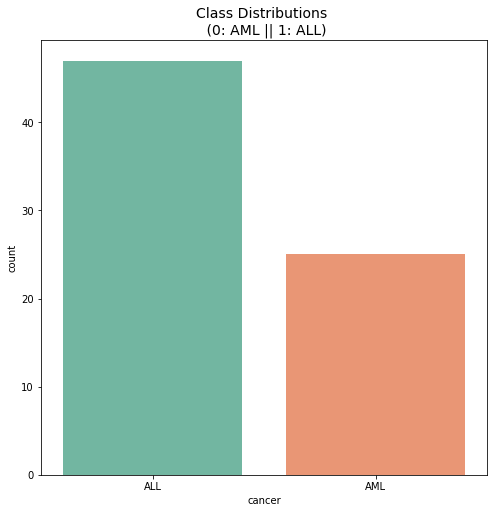

In [106]:
plt.figure(figsize=(8,8))
colors = ["AML", "ALL"]
sns.countplot('cancer', data=y, palette = "Set2")
plt.title('Class Distributions \n (0: AML || 1: ALL)', fontsize=14)

In [107]:
# Split the data sets into X_train, X_test, y_training, y_test and then combine (X_train, y_train), (X_test, y_test)
X_train = train.reset_index(drop=True)
y_train = y[y.patient <= 38].reset_index(drop=True)

X_train = pd.concat([y_train, X_train], axis=1)

X_test = test.reset_index(drop=True)
y_test= y[y.patient > 38].reset_index(drop=True)

X_test = pd.concat([y_test, X_test], axis=1)

In [108]:
sample = X_train.iloc[:,2:].sample(n=100, axis=1)
sample["cancer"] = X_train.cancer
sample.describe().round()

,5993,2622,4580,454,2802,4398,5815,6566,5125,6140,...,1774,6657,7117,2898,2088,6390,4187,2527,340,4579
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,3393.0,95.0,563.0,-39.0,7419.0,505.0,117.0,124.0,206.0,783.0,...,9757.0,44.0,-1679.0,79.0,-96.0,491.0,304.0,36.0,182.0,14.0
std,1403.0,48.0,245.0,92.0,2448.0,432.0,119.0,114.0,92.0,385.0,...,3578.0,167.0,929.0,72.0,172.0,161.0,238.0,105.0,142.0,46.0
min,1666.0,11.0,235.0,-239.0,3902.0,32.0,-61.0,-87.0,58.0,33.0,...,3575.0,-281.0,-4082.0,-52.0,-476.0,139.0,1.0,-75.0,-2.0,-68.0
25%,2266.0,59.0,392.0,-90.0,5513.0,242.0,26.0,64.0,137.0,539.0,...,7028.0,-66.0,-2200.0,21.0,-198.0,404.0,104.0,-31.0,118.0,-14.0
50%,3133.0,93.0,521.0,-22.0,7126.0,380.0,96.0,105.0,200.0,714.0,...,9654.0,29.0,-1669.0,78.0,-111.0,488.0,244.0,10.0,147.0,13.0
75%,3786.0,130.0,654.0,18.0,8662.0,640.0,186.0,162.0,273.0,1026.0,...,11841.0,162.0,-1044.0,122.0,24.0,578.0,498.0,60.0,215.0,32.0
max,6764.0,228.0,1345.0,174.0,13522.0,1869.0,556.0,637.0,364.0,1758.0,...,16627.0,521.0,-164.0,226.0,370.0,1009.0,906.0,396.0,744.0,145.0


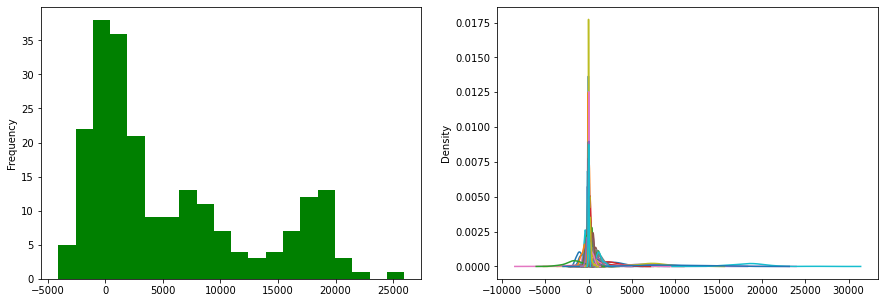

In [110]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sample = sample.drop("cancer", axis=1)
sample.plot(kind="hist", legend=None, bins=20, color='g', ax=ax[0])
sample.plot(kind="kde", legend=None, ax=ax[1])
plt.tight_layout
plt.show()

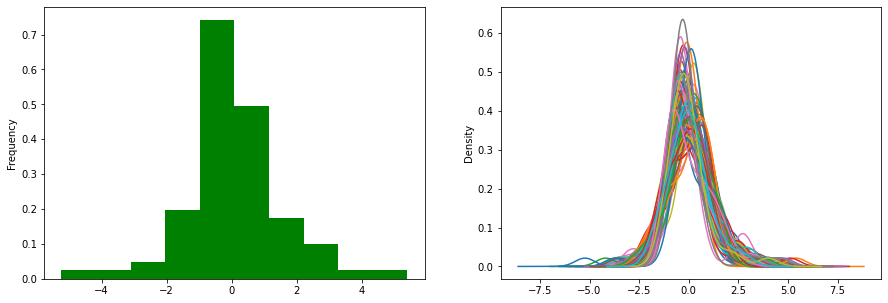

In [111]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sample_scaled = pd.DataFrame(preprocessing.scale(sample))
sample_scaled.plot(kind="hist",density=True, legend=None, bins=10, color='g', ax=ax[0])
sample_scaled.plot(kind="kde", legend=None,ax=ax[1])
plt.tight_layout
plt.show()

In [ ]:
# now try a sample on the merged data set
test = test.replace(np.inf, np.nan)
test = test.fillna(value = train.values.mean())
complete_data = X_train.append(X_test)
complete_data

In [112]:
sample = complete_data.iloc[:,2:].sample(n=100, axis=1)
sample["cancer"] = complete_data.cancer
sample.describe().round()

,829,5618,1720,5568,1580,4428,4679,3483,1776,6588,...,6011,4870,1341,6456,2521,5177,2611,3249,6388,663
count,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
mean,179.0,-27.0,214.0,328.0,-136.0,320.0,3129.0,7.0,-76.0,348.0,...,247.0,25.0,-8.0,10826.0,318.0,-150.0,262.0,220.0,32.0,545.0
std,223.0,155.0,149.0,279.0,87.0,146.0,5003.0,53.0,84.0,147.0,...,330.0,101.0,59.0,3348.0,172.0,96.0,137.0,127.0,77.0,183.0
min,-1303.0,-954.0,-98.0,27.0,-422.0,-16.0,-486.0,-127.0,-313.0,104.0,...,-292.0,-279.0,-126.0,3341.0,-85.0,-379.0,86.0,-28.0,-115.0,222.0
25%,117.0,-93.0,118.0,130.0,-174.0,210.0,-102.0,-28.0,-114.0,229.0,...,49.0,-36.0,-40.0,8454.0,195.0,-230.0,174.0,124.0,-16.0,435.0
50%,192.0,-16.0,174.0,246.0,-126.0,320.0,155.0,16.0,-72.0,324.0,...,186.0,24.0,-24.0,10965.0,306.0,-142.0,236.0,200.0,19.0,546.0
75%,268.0,61.0,276.0,378.0,-80.0,391.0,5136.0,38.0,-25.0,458.0,...,322.0,88.0,15.0,13354.0,439.0,-66.0,320.0,300.0,68.0,629.0
max,665.0,178.0,724.0,1349.0,34.0,840.0,18727.0,194.0,72.0,680.0,...,1367.0,339.0,194.0,21800.0,761.0,0.0,906.0,622.0,317.0,1112.0


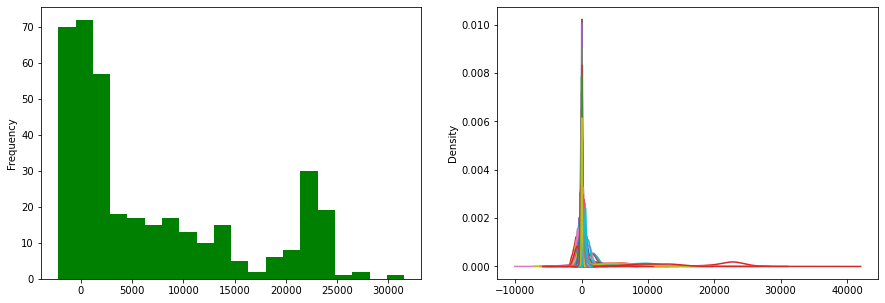

In [113]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sample = sample.drop("cancer", axis=1)
sample.plot(kind="hist", legend=None, bins=20, color='g', ax=ax[0])
sample.plot(kind="kde", legend=None, ax=ax[1])
plt.tight_layout
plt.show()

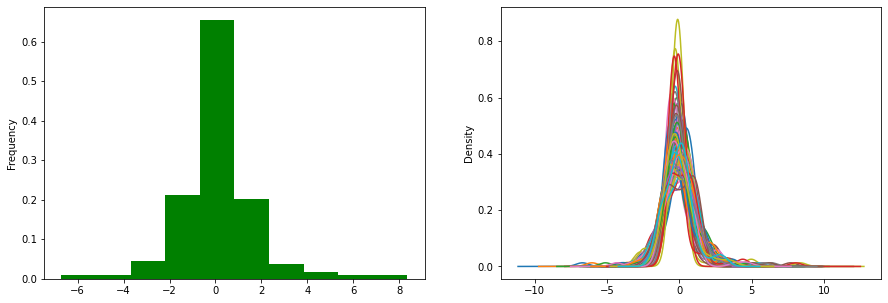

In [114]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sample_scaled = pd.DataFrame(preprocessing.scale(sample))
sample_scaled.plot(kind="hist",density=True, legend=None, bins=10, color='g', ax=ax[0])
sample_scaled.plot(kind="kde", legend=None,ax=ax[1])
plt.tight_layout
plt.show()